In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
#Read the flights
df = pd.read_csv('data/EDA_questions.csv')
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,2019-02-12,DL,2070,DL,N915DN,GSP,"Greer, SC",ATL,"Atlanta, GA",1020,1126,66.0,153,-3.0,0.0,0.0,0.0,0.0,0.0,-5.0
1,2019-05-25,AS,1438,AS,N844VA,LAX,"Los Angeles, CA",SJC,"San Jose, CA",2005,2130,85.0,308,53.0,16.0,0.0,0.0,0.0,37.0,53.0
2,2018-01-02,DL,2297,DL,N922DX,JAX,"Jacksonville, FL",ATL,"Atlanta, GA",1540,1658,78.0,270,-5.0,0.0,0.0,0.0,0.0,0.0,-13.0
3,2019-11-24,UA,4808,ZW,N419AW,IAD,"Washington, DC",ALB,"Albany, NY",1715,1854,99.0,325,-11.0,0.0,0.0,0.0,0.0,0.0,-33.0
4,2018-07-17,AA,1815,AA,N703UW,CLT,"Charlotte, NC",DCA,"Washington, DC",1310,1437,87.0,331,-4.0,0.0,0.0,0.0,0.0,0.0,-12.0


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [5]:
total_departure_delays = len(df[df['dep_delay'] > 0])
total_both_delays = len(df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)])

In [6]:
percentage_departure_delays = (total_both_delays / total_departure_delays) * 100

In [9]:
print(f'The percentage of delays caused before departure is : {percentage_departure_delays}')

The percentage of delays caused before departure is : 73.16945017826984


In [10]:
correlation = df['dep_delay'].corr(df['arr_delay'])

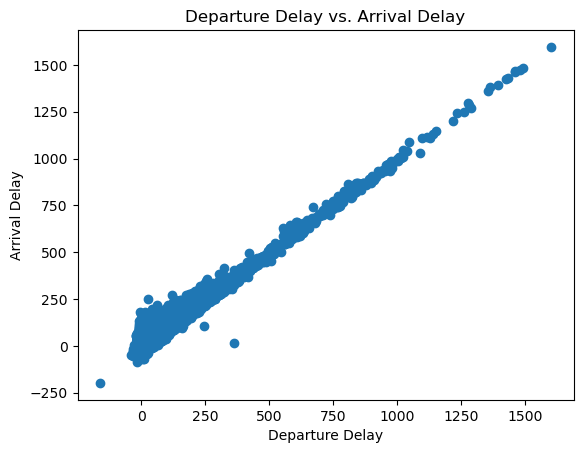

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['dep_delay'], df['arr_delay'])
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Departure Delay vs. Arrival Delay')
plt.show()

Scatter plot shows a clear upward trend, it indicates a positive  relationship between departure delays and arrival delays.

In [13]:
from sklearn.linear_model import LinearRegression

X = df['dep_delay'].values.reshape(-1, 1)
y = df['arr_delay'].values.reshape(-1, 1)

regression = LinearRegression()
regression.fit(X, y)

impact = regression.coef_[0][0]

In [14]:
impact

1.0063950091507086

The coefficient (impact) obtained from the linear regression represents the estimated impact of departure delays on arrival delays. A positive coefficient indicates that an increase in departure delays is associated with an increase in arrival delays.

In [15]:
delayed_flights = df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]

In [16]:
total_delayed_flights = delayed_flights.shape[0]

In [17]:
arrival_delay_caused_by_departure_delay = delayed_flights[delayed_flights['arr_delay'] > delayed_flights['dep_delay']].shape[0]

In [18]:
percentage = (arrival_delay_caused_by_departure_delay / total_delayed_flights) * 100

In [19]:
print(f'The percentage arrival delay caused by departure delay is : {percentage}')

The percentage arrival delay caused by departure delay is : 37.189679934345506


In [ ]:
37.18  is significant percentage of arrival delays are caused by departure delays, airlines can focus on improving their departure processes to reduce the overall delay.